In [1]:
#%% import modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py 
plt.rcParams.update({'font.size': 18})

In [2]:
# lake level calculation
time = np.linspace(0, 1, 25)
# note that the time here in unit of Ma
ll = [0]*25
for i, t in enumerate(time):
    if t<0.3:
        ll[i] = 8e2
    elif t<0.5:
        ll[i] = -4000*t+2000
    else:
        ll[i] = 1600*t-800

In [3]:
max_l_mf = []
max_ul_mf = []
max_l_mf_ht= []
max_ul_mf_ht= []
max_diff_mf = []
melt_v_l = []
melt_v_ul = []
diff_melt_v = []
t= 9
for t in range(25):

# high T    
    path = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.65_cons_load_highT_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
    f_l = h5py.File(path, 'r')
    path = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.65_unload_load_highT_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
    f_ul = h5py.File(path, 'r')
    
# really high T    
#     path = '/home/lxue07/Documents/aspect/rifting/'\
#     'output-test-from-extension_2.64_cons_load_highT_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
#     f_l = h5py.File(path, 'r')
#     path = '/home/lxue07/Documents/aspect/rifting/'\
#     'output-test-from-extension_2.64_unload_load_highT_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
#     f_ul = h5py.File(path, 'r')
    
# low T
#     path = '/home/lxue07/Documents/aspect/rifting/'\
#     'output-test-from-extension_2.64_cons_load_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
#     f_l = h5py.File(path, 'r')
#     path = '/home/lxue07/Documents/aspect/rifting/'\
#     'output-test-from-extension_2.64_unload_load_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
#     f_ul = h5py.File(path, 'r')
    
    
    path_xy = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_cons_load_hdf5/solution/mesh-00000.h5'
    mesh =h5py.File(path_xy, 'r')
    #node in x, y, z
    x = mesh['nodes'][:,0]
    y = mesh['nodes'][:,1]

    diff_mf = f_ul['melt_fraction'][:,0] - f_l['melt_fraction'][:,0]
    max_diff_mf.append(max(diff_mf))
    
    max_l_mf.append(max(f_l['melt_fraction'][:,0]))
    max_ul_mf.append(max(f_ul['melt_fraction'][:,0]))
    
    cell_v= 1250*1250 #m^2
    # length of lake
    length = 260e3 #m
    sum_melt_v_l = sum([x*cell_v for x in f_l['melt_fraction'][:,0]])
    sum_melt_v_ul = sum([x*cell_v for x in f_ul['melt_fraction'][:,0]])
    sum_diff_melt_v_l = sum([x*cell_v for x in diff_mf])
    
    melt_v_l.append(sum_melt_v_l*length*1e-9)   #in the unit of km^3
    melt_v_ul.append(sum_melt_v_ul*length*1e-9) #in the unit of km^3

    diff_melt_v.append (sum_diff_melt_v_l*length*1e-9)
    
#print (max_l_mf, max_ul_mf)

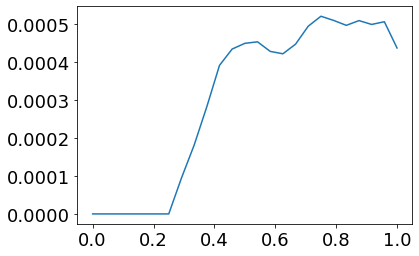

In [4]:
plt.plot(np.linspace(0, 1, 25),max_diff_mf)

0.15747912228107452 0.15740182995796204


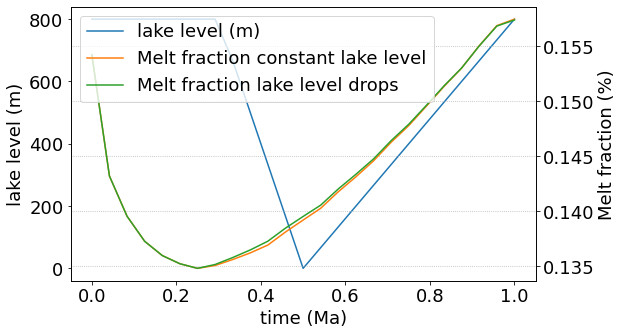

In [5]:
fig, ax = plt.subplots(figsize=(9,5))
ln1 = ax.plot(np.linspace(0, 1, 25), ll, label = 'lake level (m)')
ax.set_xlabel('time (Ma)')
ax.set_ylabel('lake level (m)')
ax2 = ax.twinx()
ln2 = ax2.plot(np.linspace(0, 1, 25),max_l_mf, c = 'C1', label = 'Melt fraction constant lake level')
ax2.set_ylabel('Melt fraction (%)')
ln3 = ax2.plot(np.linspace(0, 1, 25),max_ul_mf, c = 'C2', label = 'Melt fraction lake level drops')
lns = ln1 +ln2 + ln3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc = 'upper left')
plt.grid(linestyle='dotted')
plt.tight_layout()

print (max_l_mf[t], max_ul_mf[t])

In [7]:

# peridotite  components 
Olivine= 0.8
Opx = 0.1
Cpx = 0.5
Gar = 0.5
t = 9
ree = pd.read_csv('../table/Kelemen_2002_selected.csv', sep = '\t')

# fraction 
F_l= max_l_mf[t]
F_ul= max_ul_mf[t]
# distribution coefficient
ree['D'] = Olivine* ree['ol/liq']+ Opx*ree['opx/liq'] + Cpx*ree['cpx/liq'] +Gar*ree['gar/liq']
ree['Cl/Co_l'] = 1/(F_l + ree['ol/liq'] - ree['ol/liq']*F_l)
ree['Cl/Co_ul'] = 1/(F_ul + ree['ol/liq'] - ree['ol/liq']*F_ul)

# Cl/Co = 1/(F+D-F*D)
#ree= ree.iloc[:-2]
ree['Cl/Co_l'] = 1/(F_l + ree['D'] - ree['D']*F_l)
ree['Cl/Co_ul'] = 1/(F_ul + ree['D'] - ree['D']*F_ul)

ree['Cl/Co_l_normalized'] =ree['Cl/Co_l']/ree['chondrite(ppm)']
ree['Cl/Co_ul_normalized'] =ree['Cl/Co_ul']/ree['chondrite(ppm)']

ree['Cl/Co_change in_per'] =  (ree['Cl/Co_ul']- ree['Cl/Co_l'])/ree['Cl/Co_l']
ree.head()

,element,ol/liq,opx/liq,cpx/liq,gar/liq,sp/liq,chondrite(ppm),D,Cl/Co_l,Cl/Co_ul,Cl/Co_l_normalized,Cl/Co_ul_normalized,Cl/Co_change in_per
0,La,0.000007,0.001,0.0536,0.001,0.0006,0.237,0.027406,6.254014,6.243783,26.388246,26.345078,-0.001636
1,Ce,0.000010,0.003,0.0858,0.008,0.0006,0.612,0.047208,5.649650,5.641469,9.231454,9.218087,-0.001448
2,Nd,0.000070,0.009,0.1870,0.057,0.0006,0.467,0.122956,4.124879,4.120863,8.832718,8.824118,-0.000974
3,Sm,0.000700,0.020,0.2910,0.217,0.0006,0.153,0.256560,2.794583,2.793020,18.265249,18.255032,-0.000559
4,Eu,0.000950,0.030,0.3300,0.450,0.0006,0.058,0.393760,2.099318,2.098599,36.195147,36.182742,-0.000343


Text(58.5, 0.5, 'Cl/Co')

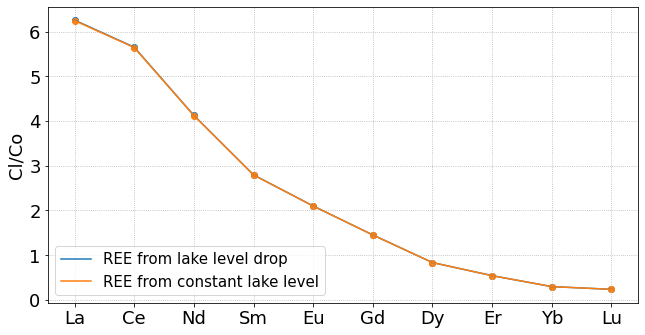

In [99]:

fig, ax = plt.subplots(figsize=(9,5))

plt.scatter(ree['element'], ree['Cl/Co_l'])
plt.plot(ree['element'], ree['Cl/Co_l'], label = 'REE from lake level drop')
plt.scatter(ree['element'], ree['Cl/Co_ul'])
plt.plot(ree['element'], ree['Cl/Co_ul'], label = 'REE from constant lake level')

# plt.scatter(ree['element'], ree['Cl/Co_l_normalized'])
# plt.plot(ree['element'], ree['Cl/Co_l_normalized'], label = 'REE from lake level drop')
# plt.scatter(ree['element'], ree['Cl/Co_ul_normalized'])
# plt.plot(ree['element'], ree['Cl/Co_ul_normalized'], label = 'REE from constant lake level')

# plt.scatter(ree['element'], ree['Cl/Co_change in_per']*100)
# plt.plot(ree['element'], ree['Cl/Co_change in_per']*100, 
#          label = 'REE concentration lake level drop vs constant lake level ')

plt.legend(loc = 'lower left', fontsize = 15)
plt.grid(linestyle='dotted')
plt.tight_layout()
#plt.yscale('log')
#plt.ylabel('concentration normalized to chondrites')
plt.ylabel('REE changes in %')
plt.ylabel('Cl/Co')

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
ln1 = ax.plot(np.linspace(0, 1, 25), ll, label = 'lake level (m)')
ax.set_xlabel('time (Ma)')
ax.set_ylabel('lake level (m)')
ax2 = ax.twinx()
ln2 = ax2.plot(np.linspace(0, 1, 25),max_l_mf_ht, c = 'C1', label = 'Melt fraction constant lake level')
ax2.set_ylabel('Melt fraction (%)')
ln3 = ax2.plot(np.linspace(0, 1, 25),max_ul_mf_ht, c = 'C2', label = 'Melt fraction lake level drops')
lns = ln1 +ln2 + ln3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc = 'upper left')
plt.grid(linestyle='dotted')
plt.tight_layout()

13.649441301822662 13.622502982616425 0.026938319206237793 0.028243660926818848


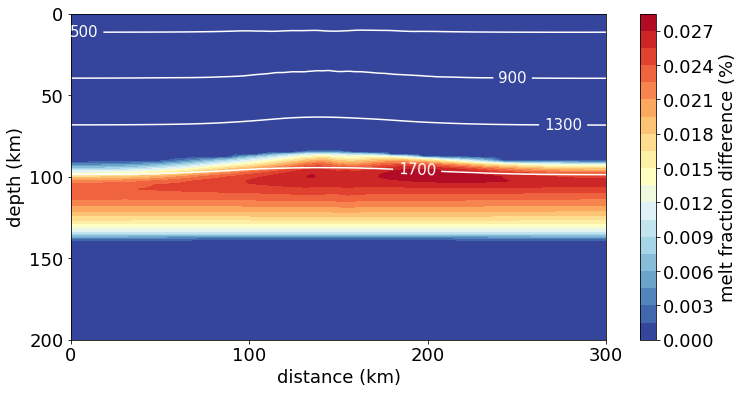

In [114]:
# really high T    
t = 9
# high T    
path = '/home/lxue07/Documents/aspect/rifting/'\
'output-test-from-extension_2.65_cons_load_highT_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
f_l = h5py.File(path, 'r')
path = '/home/lxue07/Documents/aspect/rifting/'\
'output-test-from-extension_2.65_unload_load_highT_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
f_ul = h5py.File(path, 'r')
    
# really high T    
# path = '/home/lxue07/Documents/aspect/rifting/'\
# 'output-test-from-extension_2.64_cons_load_highT_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
# f_l = h5py.File(path, 'r')
# path = '/home/lxue07/Documents/aspect/rifting/'\
# 'output-test-from-extension_2.64_unload_load_highT_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
# f_ul = h5py.File(path, 'r')
    
# low T
# path = '/home/lxue07/Documents/aspect/rifting/'\
# 'output-test-from-extension_2.64_cons_load_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
# f_l = h5py.File(path, 'r')
# path = '/home/lxue07/Documents/aspect/rifting/'\
# 'output-test-from-extension_2.64_unload_load_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
# f_ul = h5py.File(path, 'r')
    
path_xy = '/home/lxue07/Documents/aspect/rifting/'\
'output-test-from-extension_2.64_cons_load_hdf5/solution/mesh-00000.h5'
mesh =h5py.File(path_xy, 'r')

#node in x, y, z
x = mesh['nodes'][:,0]
y = mesh['nodes'][:,1]
mf_ul = f_ul['melt_fraction'][:,0]*100
mf_l = f_l['melt_fraction'][:,0]*100
# max_l_mf.append(max(f_l['melt_fraction'][:,0]))
# max_ul_mf.append(max(f_ul['melt_fraction'][:,0]))
t = f_ul['T'][:,0]

fig,ax = plt.subplots(figsize=(12,6))

ax1 = plt.tricontour(x, y, t, colors=['white'], levels = [500, 900, 1300, 1700])
plt.tricontourf(x, y, mf_ul -mf_l,cmap='RdYlBu_r', levels = 20)
plt.colorbar(label = 'melt fraction difference (%)')
plt.xlabel('distance (km)')
plt.ylabel('depth (km)')

ax.set_xticks([0, 100000, 200000, 300000])
ax.set_xticklabels([0, 100,200, 300 ])

ax.set_yticks([0, 50000, 100000, 150000, 200000])
ax.set_yticklabels([200, 150,100, 50, 0 ])
plt.clabel(ax1, fontsize=15, inline=1,fmt = '%1.0f')

print (max(mf_ul), max(mf_l),max(mf_ul)-max(mf_l), max(mf_ul- mf_l))
# high T: 0.13649441301822662 0.13622502982616425 0.00026938319206237793 0.0002824366092681885
# low T: 0.0009477179264649749 0.0008943374850787222 5.342753138393164e-05